# Problem Statement:
- Perform sentimental analysis on the Elon-musk tweets, obtained from twitter

In [1]:
import pandas as pd
import numpy as np 
import string 
import spacy 
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import re

In [3]:
df = pd.read_csv('Elon_musk.csv',encoding = 'cp1252')

In [4]:
df.drop(columns='Unnamed: 0',axis =1,inplace=True)
df

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Text cleaning
- Remove unwanted characters
- Text normalization
- Split the text
- lemmatization
- Join the text

In [5]:
lemma = WordNetLemmatizer()

corpus = []

for i in range(len(df)):
    msg = re.sub('[^a-zA-Z]',' ',df['Text'][i])
    msg = msg.lower()
    msg = msg.split()
    
    msg = [lemma.lemmatize(i) for i in msg if i not in stopwords.words('english')]
    msg = ' '.join(msg)
    corpus.append(msg)

In [6]:
corpus

['kunalb alien',
 'id aa carmack ray tracing cyberpunk hdr next level tried',
 'joerogan spotify great interview',
 'gtera doge underestimated',
 'teslacn congratulation tesla china amazing execution last year next even',
 'happy new year ox http co wfkmyu oj',
 'frodo underdoge thought would fail http co zgxjfdzzrm',
 'owensparks flcnhvy anonyx haha thanks',
 'flcnhvy anonyx indeed tweet definitely represent real world time allocation',
 'entertaining outcome likely',
 'givedirectly sent',
 'agree clubhouse kanyewest',
 'http co rwe uhsts',
 'geoffkeighley unrealengine getting real',
 'bought dogecoin lil x toddler hodler',
 'joshmanmode definitely issue sentencing seems bit high',
 'freewalletorg thanks fixing',
 'freewalletorg please unlock account',
 'astrojordy u f u f',
 'true power haha http co fc uhqsd',
 'freewalletorg crypto wallet give private key avoided cost',
 'freewalletorg app suck',
 'rt spacex nasa selected falcon heavy launch first two element lunar gateway together 

In [7]:
import collections
from collections import Counter

In [8]:
df['clean'] = pd.DataFrame(corpus)

In [9]:
df

,Text,clean
0,@kunalb11 I’m an alien,kunalb alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id aa carmack ray tracing cyberpunk hdr next l...
2,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,@gtera27 Doge is underestimated,gtera doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulation tesla china amazing exe...
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true sound surreal negative propaganda...
1995,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure read ur term amp condition ...
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb dumber u f u f


Text(0, 0.5, 'Count')

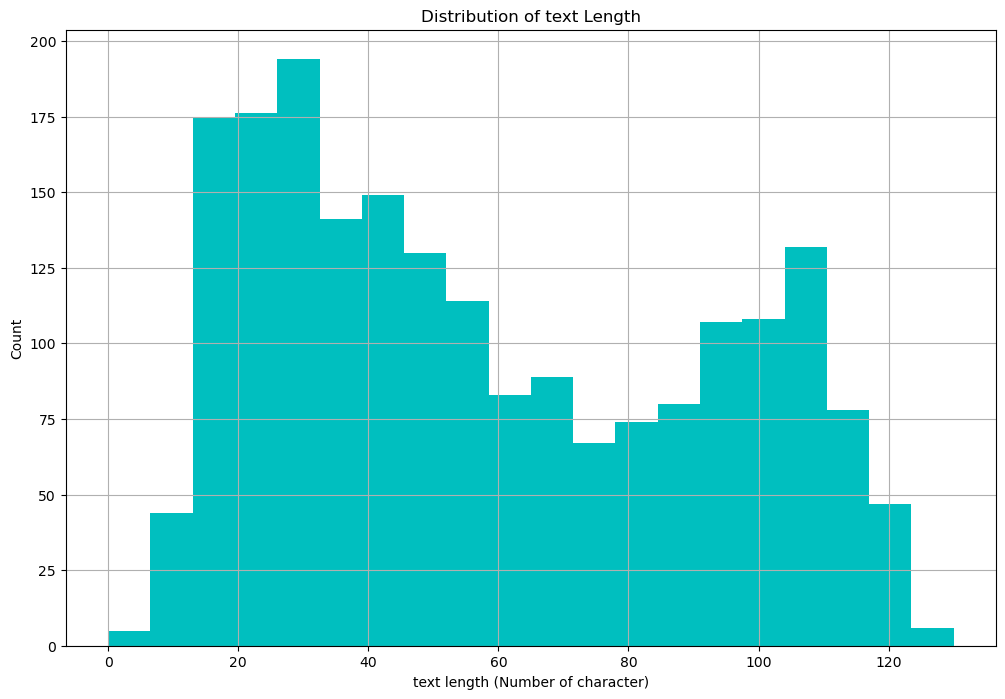

In [10]:
text_length = df["clean"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
text_length.loc[text_length < 1500].hist(color='c',bins=20)
plt.title("Distribution of text Length")
plt.xlabel('text length (Number of character)')
plt.ylabel('Count')

In [11]:
from textblob import TextBlob
df['polarity'] = df["clean"].apply(lambda x: TextBlob(x).sentiment[0])
df[['clean','polarity']].head(5)

,clean,polarity
0,kunalb alien,-0.25
1,id aa carmack ray tracing cyberpunk hdr next l...,0.00
2,joerogan spotify great interview,0.80
3,gtera doge underestimated,0.00
4,teslacn congratulation tesla china amazing exe...,0.20


In [12]:
Tweets = df.drop(['Text'], axis= 1)

In [13]:
Tweets

,clean,polarity
0,kunalb alien,-0.250000
1,id aa carmack ray tracing cyberpunk hdr next l...,0.000000
2,joerogan spotify great interview,0.800000
3,gtera doge underestimated,0.000000
4,teslacn congratulation tesla china amazing exe...,0.200000
...,...,...
1994,flcnhvy true sound surreal negative propaganda...,0.152381
1995,ppathole make sure read ur term amp condition ...,0.500000
1996,teslagong ppathole samwise gamgee,0.000000
1997,ppathole altho dumb dumber u f u f,-0.375000


# Visualizing the Twitter data with word cloud, to see the highly commnly used words in the tweets

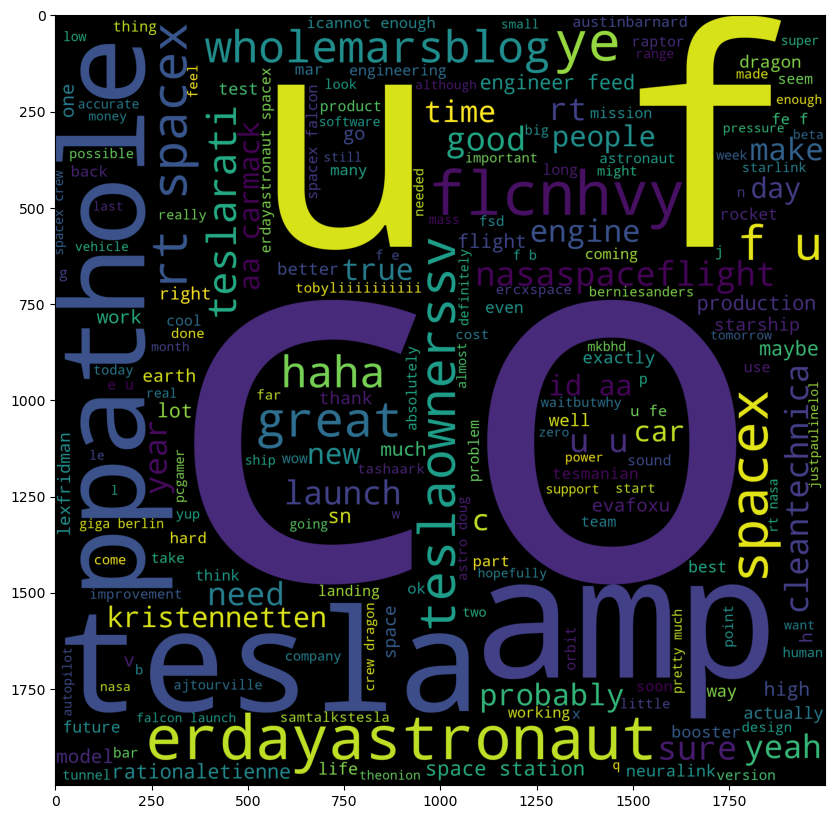

In [14]:
Review_wordcloud = ' '.join(Tweets["clean"])
Q_wordcloud=WordCloud(
                    background_color='black',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

# Creating a user defined function to identify if the tweets are positive,negative or neutral

In [15]:
def sent_type(Tweets): 
    for i in (Tweets):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [16]:
sent_type(Tweets['polarity'])

negative
neutral
positive
neutral
positive
positive
negative
positive
positive
positive
neutral
neutral
neutral
positive
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
positive
neutral
positive
negative
negative
neutral
neutral
neutral
neutral
neutral
negative
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
neutral
neutral
neutral
negative
neutral
neutral
positive
neutral
neutral
positive
positive
neutral
neutral
positive
negative
neutral
neutral
positive
neutral
neutral
positive
negative
positive
positive
positive
negative
neutral
neutral
positive
neutral
neutral
positive
positive
positive
neutr

In [17]:
Tweets["category"]=Tweets['polarity']

Tweets.loc[Tweets.category > 0,'category']="Positive"
Tweets.loc[Tweets.category !='Positive','category']="Negative"

Tweets["category"]=Tweets["category"].astype('category')
Tweets.dtypes

clean         object
polarity     float64
category    category
dtype: object

In [18]:
import seaborn as sns

- Visualising the positive and the negative words in the Elon musk tweet on the whole

<AxesSubplot:xlabel='category', ylabel='count'>

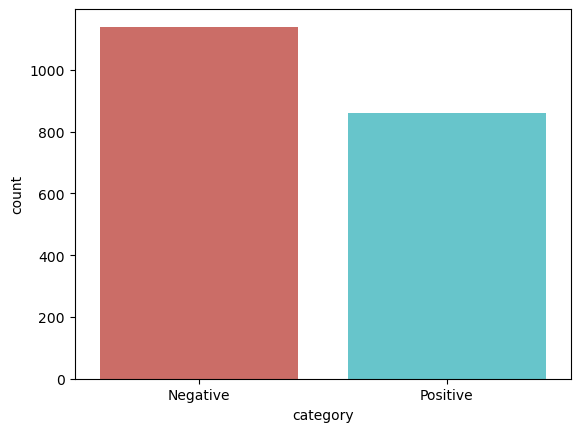

In [19]:
sns.countplot(x='category',data=Tweets,palette='hls')

In [20]:
Tweets.category.value_counts(normalize=True).mul(100)

Negative    57.028514
Positive    42.971486
Name: category, dtype: float64

- Visualising the positive and negative words used in the tweets, using Word cloud

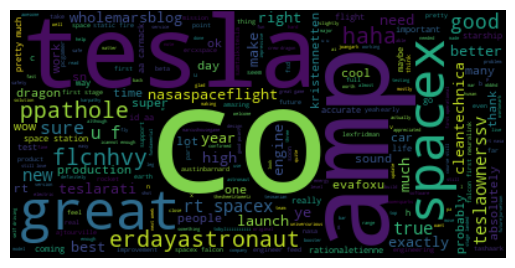

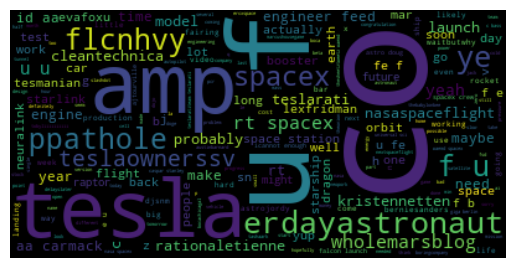

In [21]:
positive_reviews= Tweets[Tweets.category=='Positive']
negative_reviews= Tweets[Tweets.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.clean.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.clean.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()


# Conclusion:
- the probabilties predicted by sentiment analysis, these tweets have 58% negative words and 42% positive words¶
